In [1]:
#!pip install boto3
#!pip install fsspec
#!pip install s3fs
import glob
import boto3
import os
import pandas as pd

bucket = "emba-final-project"    
prefix = "csv/review_boulder_with_sentiment.csv"


In [2]:
rows_to_process = 5000

df=pd.read_csv(f's3://{bucket}/{prefix}')
df.head(5)
df=df.head(rows_to_process)

In [3]:
!pip install --upgrade pip
!pip install pyLDAvis
!pip install bokeh
!pip install gensim
!pip install spacy
# !pip install logging
# !pip install warnings
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install -U seaborn

     |████████████████████████████████| 13.7 MB 14.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import numpy as np
!pip install --upgrade numpy
#!pip install python-Levenshtein

In [5]:
import sys
import re
import numpy as np
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings, en_core_web_sm
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['the', 'boulder', 'place', 'good']) #, 'subject', 'co', 'https', 'http', 'twitter', 'amp', 'covid', 'gofundme']) # After reviewing the LDA, return to add words that you want to eliminate

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\\S*@\\S*\\s?', '', sent)  # remove emails
        sent = re.sub('\\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert each review to a list of cleaned words and add to a master list
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
for review in data_words[:5]: # print the first :n review word lists
  print(review)

df['words'] = data_words
df.head()

['the', 'food', 'is', 'always', 'great', 'here', 'the', 'service', 'from', 'both', 'the', 'manager', 'as', 'well', 'as', 'the', 'staff', 'is', 'super', 'only', 'draw', 'back', 'of', 'this', 'restaurant', 'is', 'its', 'super', 'loud', 'if', 'you', 'can', 'snag', 'patio', 'table']
['brasserie', 'zero', 'zero', 'we', 'were', 'hoping', 'for', 'ten', 'based', 'on', 'how', 'highly', 'recommended', 'it', 'was', 'however', 'we', 'were', 'very', 'disappointed', 'with', 'the', 'quality', 'of', 'the', 'food', 'we', 'ordered', 'escargot', 'and', 'artichoke', 'to', 'start', 'escargot', 'was', 'covered', 'in', 'bitter', 'green', 'sauce', 'butter', 'and', 'garlic', 'would', 'have', 'really', 'helped', 'the', 'artichoke', 'wasnt', 'cooked', 'properly', 'and', 'was', 'minimally', 'seasoned', 'it', 'was', 'also', 'small', 'portions', 'about', 'fourth', 'of', 'an', 'artichoke', 'in', 'size', 'even', 'after', 'sending', 'back', 'the', 'artichoke', 'it', 'still', 'was', 'tough', 'and', 'not', 'fully', 'coo

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,stars,useful,funny,cool,text,date,dt_obj,year,month,hour,review_age,Sentiment,words
0,0,0,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,2011-07-28 18:05:01,2011,7,18,9.681334,MIXED,"[the, food, is, always, great, here, the, serv..."
1,1,1,eiAeuhR3kurAO8rAt_rhlg,7zEJt0NVl-lMiMwkCsvteg,8zehGz9jnxPqXtOc7KaJxA,2.0,0,0,0,Brasserie zero zero... we were hoping for a te...,2018-08-04 20:52:32,2018-08-04 20:52:32,2018,8,20,2.661022,NEGATIVE,"[brasserie, zero, zero, we, were, hoping, for,..."
2,2,2,Ye8Uh3aBfGoEWgC7DEI8YA,32HQqHGHqcDnNteK835C-Q,8zehGz9jnxPqXtOc7KaJxA,5.0,0,0,1,I absolutely love this restaurant. I've been c...,2014-04-01 02:29:55,2014-04-01 02:29:55,2014,4,2,7.005439,POSITIVE,"[absolutely, love, this, restaurant, ive, been..."
3,3,3,K7ePsxtmSyaxZPJTJOm9GA,Hh2tjnqWBYDcGK3YR-_fow,ywqcgiVfX3sorqlKs1nhLw,5.0,0,0,0,I used Precision through my insurance for wind...,2016-07-14 20:04:01,2016-07-14 20:04:01,2016,7,20,4.717282,POSITIVE,"[used, precision, through, my, insurance, for,..."
4,4,4,zDlr3bWWZRUJ-0JGBXZwAw,kP92EoMqvHJVnoSaPXtShg,5P3b82EqZqR7lCqAYj-zaQ,4.0,0,0,0,Great quick service despite the fact that ever...,2013-04-10 17:59:33,2013-04-10 17:59:33,2013,4,17,7.978366,POSITIVE,"[great, quick, service, despite, the, fact, th..."


In [7]:
length = ''
for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        length += data_words[i][j]
print(f'Corpus size: {str(len(length))}')

Corpus size: 2091635


In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [9]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and perform Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])    # Load spacy, but we don't need the parser or NER (named entity extraction) modules
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)
for review in data_ready[:5]:
  print(review)

df['words'] = data_ready

['food', 'always', 'great', 'service', 'manager', 'staff', 'super', 'draw', 'back', 'restaurant', 'super', 'loud', 'snag', 'patio', 'table']
['brasserie', 'hope', 'base', 'however', 'disappointed', 'quality', 'food', 'order', 'escargot', 'artichoke', 'start', 'escargot', 'cover', 'bitter', 'green', 'sauce', 'butter', 'garlic', 'really', 'help', 'artichoke', 'cook', 'properly', 'minimally', 'season', 'also', 'small', 'portion', 'fourth', 'artichoke', 'size', 'even', 'send', 'back', 'artichoke', 'still', 'tough', 'fully', 'cook', 'order', 'lamb_chop', 'main', 'side', 'mashed_potatoe', 'potato', 'sour', 'creamy', 'expect', 'receive', 'lamb_chop', 'tasty', 'mustard', 'sauce', 'accompany', 'vegetable', 'tasteless', 'disappointing', 'ambiance', 'service', 'great', 'yummy', 'bring', 'table', 'birthday', 'celebrating', 'wish', 'rest', 'meal', 'live', 'hype']
['absolutely', 'love', 'restaurant', 'come', 'brasserie', 'year', 'chance', 'visit', 'brunch', 'lunch', 'dinner', 'enjoy', 'several', 'de

In [10]:
def lda(data_ready=None, id2word=None, corpus=None, start=2, iterations=10, every=2):
  coherence_list = []
    
  print(f'Topics\tPerplexity\tCoherence')
  for topics in range(start, (start + iterations) * every, every):
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=topics, random_state=100,
                                                update_every=1, chunksize=20, passes=20, alpha='symmetric',
                                                iterations=500,per_word_topics=True)

    # Compute LDA metrics
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    print(f'{topics}\t{round(lda_model.log_perplexity(corpus), 4)}\t\t{round(coherence_model_lda.get_coherence(), 4)}')
    coherence_list.append(coherence_model_lda.get_coherence())

  # Determine the numer of topics for the LDA with the highest coherence score
  best_topics = (coherence_list.index(max(coherence_list)) + start) * every
    
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=best_topics, random_state=100,
                                              update_every=1, chunksize=20, passes=20, alpha='symmetric',
                                              iterations=500,per_word_topics=True)

  ldatopics = lda_model.show_topics(formatted=False)
  pprint(lda_model.print_topics())
  return lda_model


# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

lda_model = lda(data_ready, id2word, corpus, start=2, iterations=9, every=1)
num_topics = len(lda_model.get_topics())

Topics	Perplexity	Coherence
2	-7.7058		0.3916
3	-7.7534		0.3903
4	-7.852		0.3478
5	-7.9861		0.3253
6	-8.0546		0.3348
7	-8.1417		0.3508
8	-8.2323		0.3625
9	-8.3562		0.328
10	-8.5403		0.391
[(0,
  '0.024*"food" + 0.014*"great" + 0.011*"order" + 0.010*"get" + '
  '0.010*"service" + 0.009*"go" + 0.009*"come" + 0.008*"well" + 0.008*"love" + '
  '0.007*"restaurant"'),
 (1,
  '0.012*"get" + 0.010*"go" + 0.010*"time" + 0.007*"customer" + 0.007*"work" + '
  '0.006*"service" + 0.006*"make" + 0.006*"say" + 0.006*"even" + 0.006*"take"')]


In [11]:
def store_topic_scores(ldamodel=None, corpus=None, texts=data, df=df):
  # Create the new, zeroed columns to store the topic scores, dominant topic, and dominant topic score
  df['Dominant_topic'] = 0
  df['Dominant_score'] = 0.0
  num_topics = len(ldamodel.get_topics())
  for col in range(num_topics):
    df[f'topic_{col + 1}'] = 0.0
    
  # Store the topic score and dominant topic
  for i, words in enumerate(texts):
    doc = ldamodel[id2word.doc2bow(words)] # generate a corpus for this document set of workds
        
    for j, score in enumerate(doc[0]):
      df.iat[i, (len(df.columns) - ((num_topics) - score[0]))] = score[1]
        
    topic_score_list = [x[1] for x in doc[0]]
    dominant_topic = topic_score_list.index(max(topic_score_list))
    df.at[i, 'Dominant_topic'] = dominant_topic + 1
    df.at[i, 'Dominant_score'] = topic_score_list[dominant_topic]
    
  return(df)

In [12]:
df = store_topic_scores(lda_model, corpus, data_ready)
#df.to_csv(f'twitter_with_LDA.csv', index=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,stars,useful,funny,cool,text,...,year,month,hour,review_age,Sentiment,words,Dominant_topic,Dominant_score,topic_1,topic_2
0,0,0,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,...,2011,7,18,9.681334,MIXED,"[food, always, great, service, manager, staff,...",1,0.848820,0.848820,0.151180
1,1,1,eiAeuhR3kurAO8rAt_rhlg,7zEJt0NVl-lMiMwkCsvteg,8zehGz9jnxPqXtOc7KaJxA,2.0,0,0,0,Brasserie zero zero... we were hoping for a te...,...,2018,8,20,2.661022,NEGATIVE,"[brasserie, hope, base, however, disappointed,...",1,0.910739,0.910739,0.089261
2,2,2,Ye8Uh3aBfGoEWgC7DEI8YA,32HQqHGHqcDnNteK835C-Q,8zehGz9jnxPqXtOc7KaJxA,5.0,0,0,1,I absolutely love this restaurant. I've been c...,...,2014,4,2,7.005439,POSITIVE,"[absolutely, love, restaurant, come, brasserie...",1,0.987953,0.987953,0.012047
3,3,3,K7ePsxtmSyaxZPJTJOm9GA,Hh2tjnqWBYDcGK3YR-_fow,ywqcgiVfX3sorqlKs1nhLw,5.0,0,0,0,I used Precision through my insurance for wind...,...,2016,7,20,4.717282,POSITIVE,"[use, precision, insurance, windshield, replac...",2,0.972791,0.027209,0.972791
4,4,4,zDlr3bWWZRUJ-0JGBXZwAw,kP92EoMqvHJVnoSaPXtShg,5P3b82EqZqR7lCqAYj-zaQ,4.0,0,0,0,Great quick service despite the fact that ever...,...,2013,4,17,7.978366,POSITIVE,"[great, quick, service, fact, table, full, lar...",1,0.966176,0.966176,0.033824


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


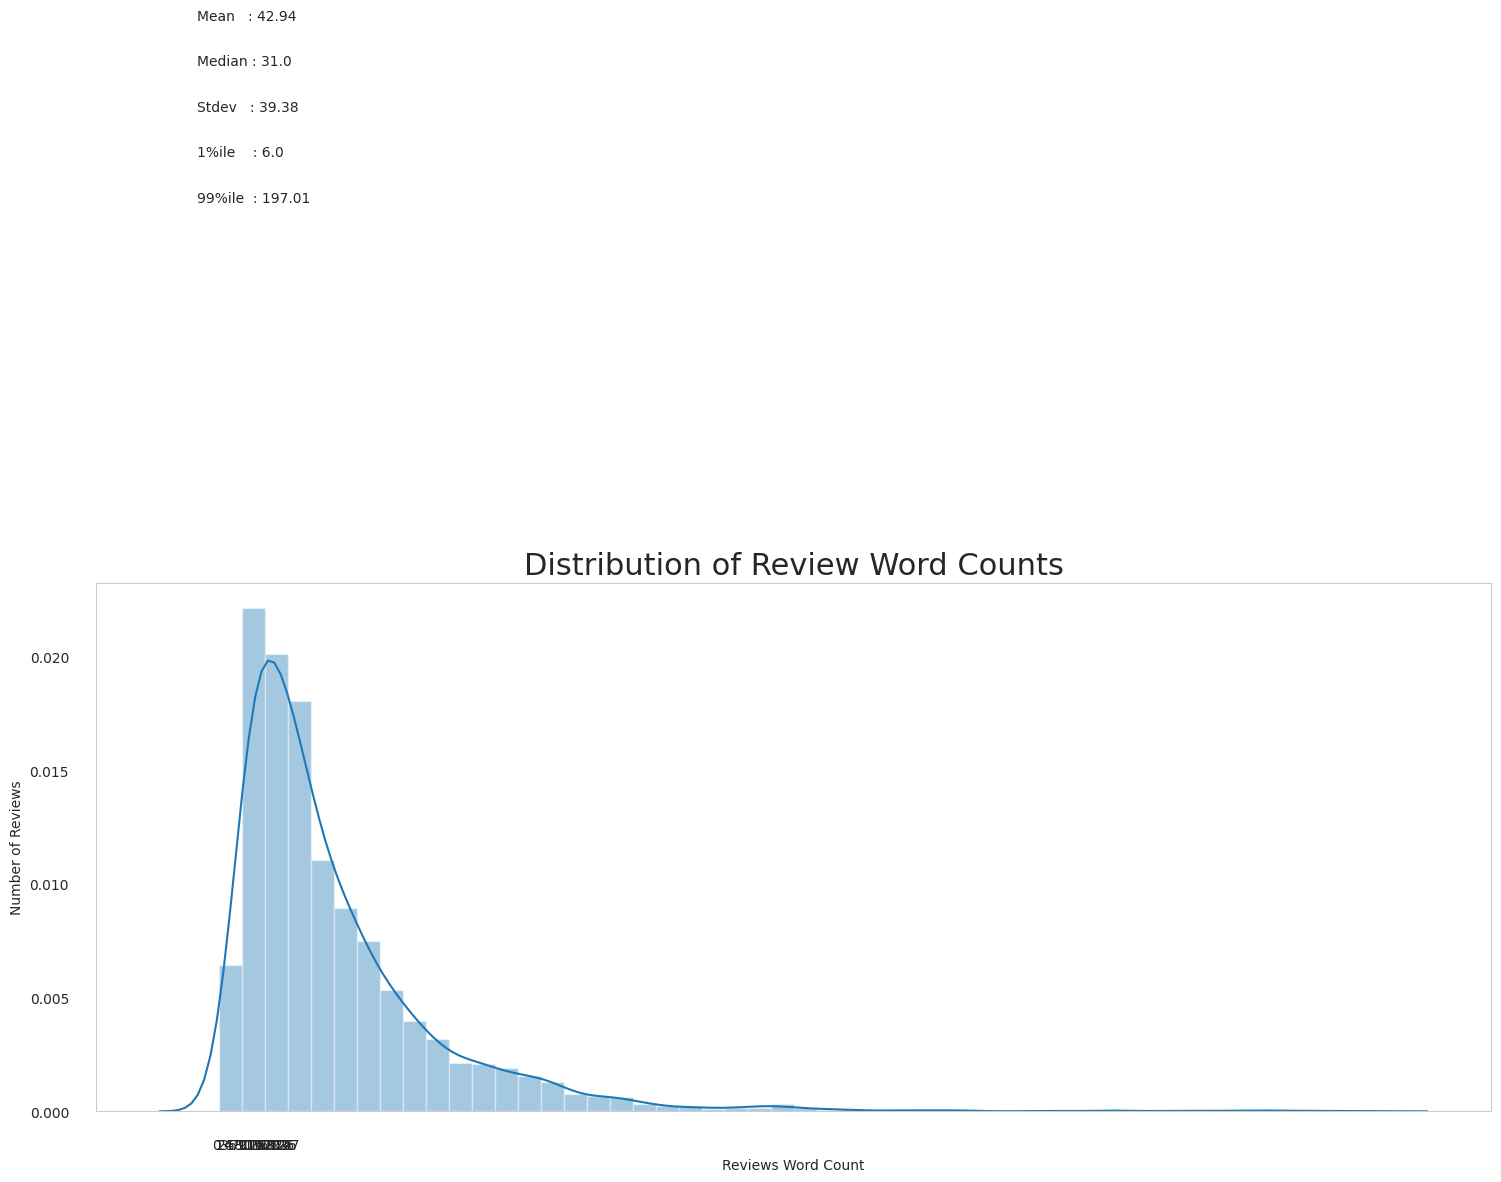

In [13]:
doc_lens = [len(d) for d in df.words]

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(18,7), dpi=100)
sns.distplot(doc_lens)
plt.text(-7, .048, "Mean   : " + str(round(np.mean(doc_lens), 2)))
plt.text(-7, .046, "Median : " + str(round(np.median(doc_lens), 2)))
plt.text(-7, .044, "Stdev   : " + str(round(np.std(doc_lens), 2)))
plt.text(-7, .042, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01), 2)))
plt.text(-7, .040, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99), 2)))

plt.gca().set(ylabel='Number of Reviews', xlabel='Reviews Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,27,28))
plt.title('Distribution of Review Word Counts', fontdict=dict(size=22))
plt.show()

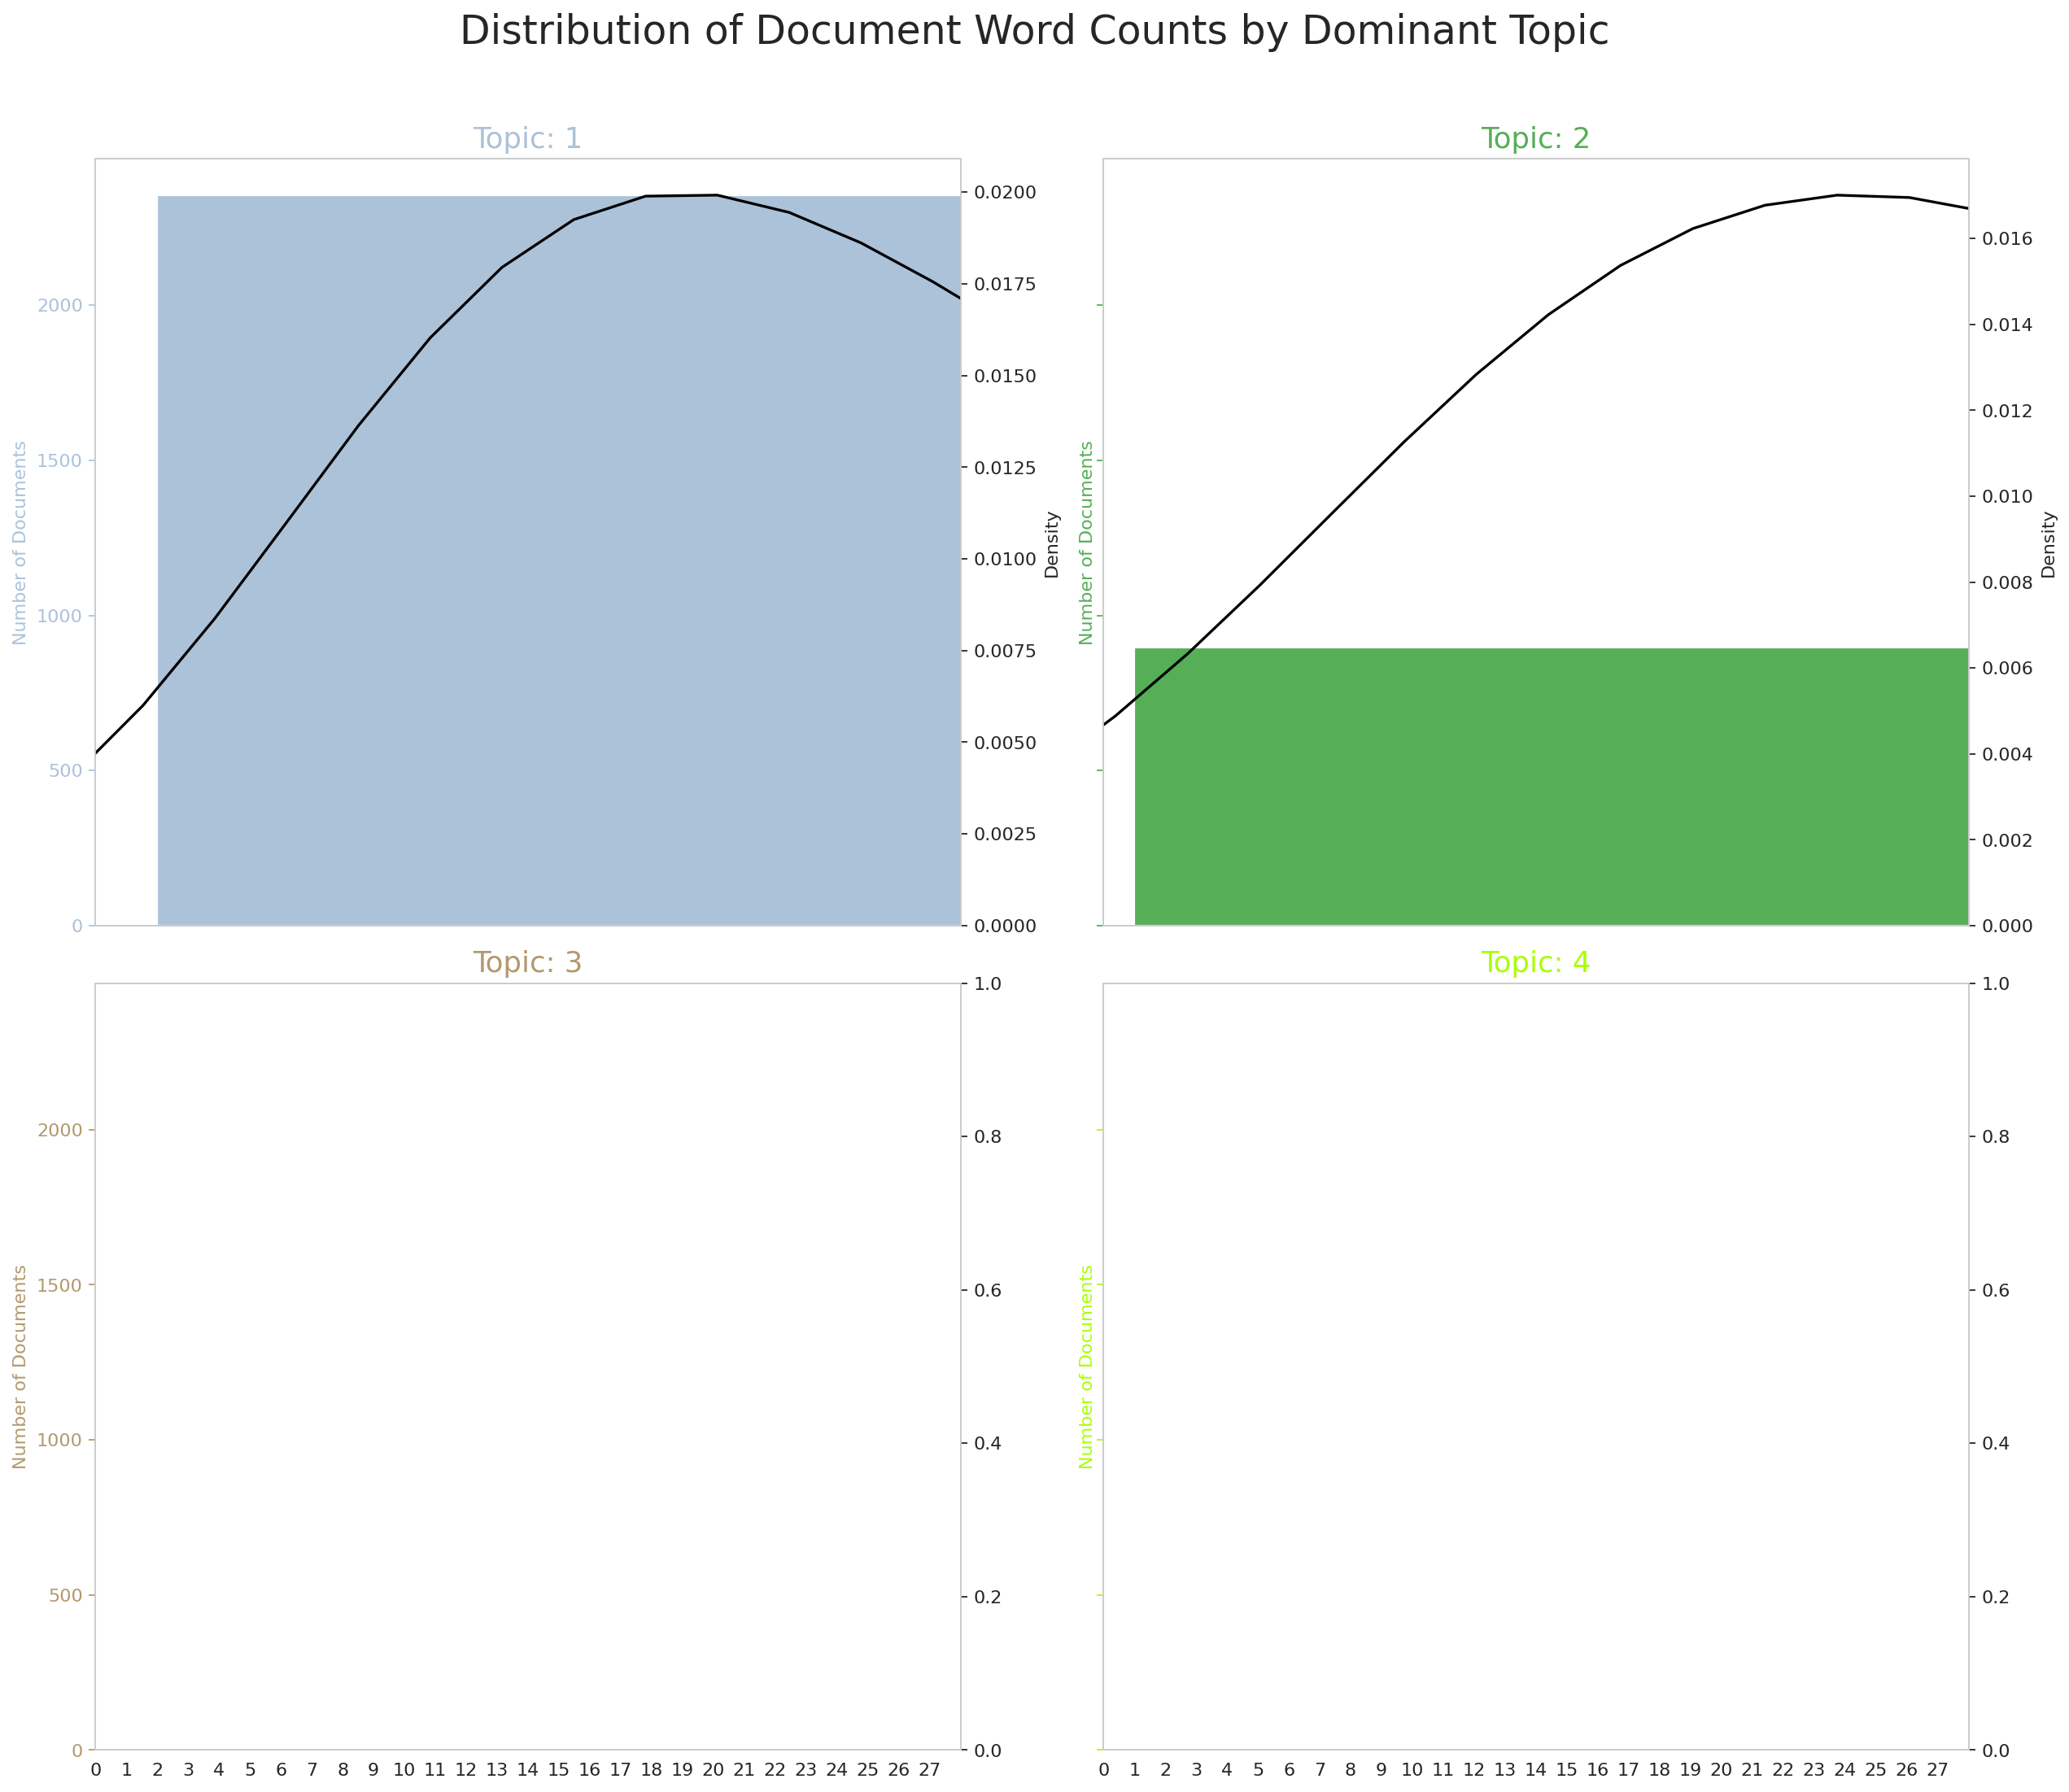

In [14]:
import matplotlib.colors as mcolors
import math
cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS' or 'mcolors.CSS4_COLORS'

fig, axes = plt.subplots(math.ceil(num_topics**(1/2)), math.ceil(num_topics**(1/2)), figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_sub = df.loc[df.Dominant_topic == (i + 1), :]
    doc_lens = [len(d) for d in df_sub.words]
    ax.hist(doc_lens, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    #sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx(), bw=1.5)
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx(), bw_method="silverman", bw_adjust=1)
    ax.set(xlim=(0, 28), xlabel='')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i + 1), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,27,28))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

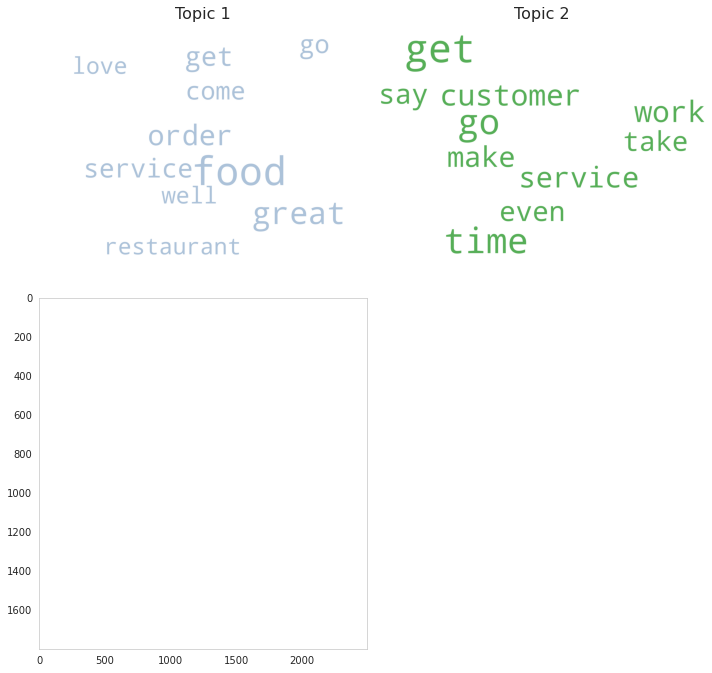

In [15]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS', fewer colors: 'mcolors.TABLEAU_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(math.ceil(num_topics**(1/2)), math.ceil(num_topics**(1/2)), figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
      plt.gca().axis('off')
    except:
      continue


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


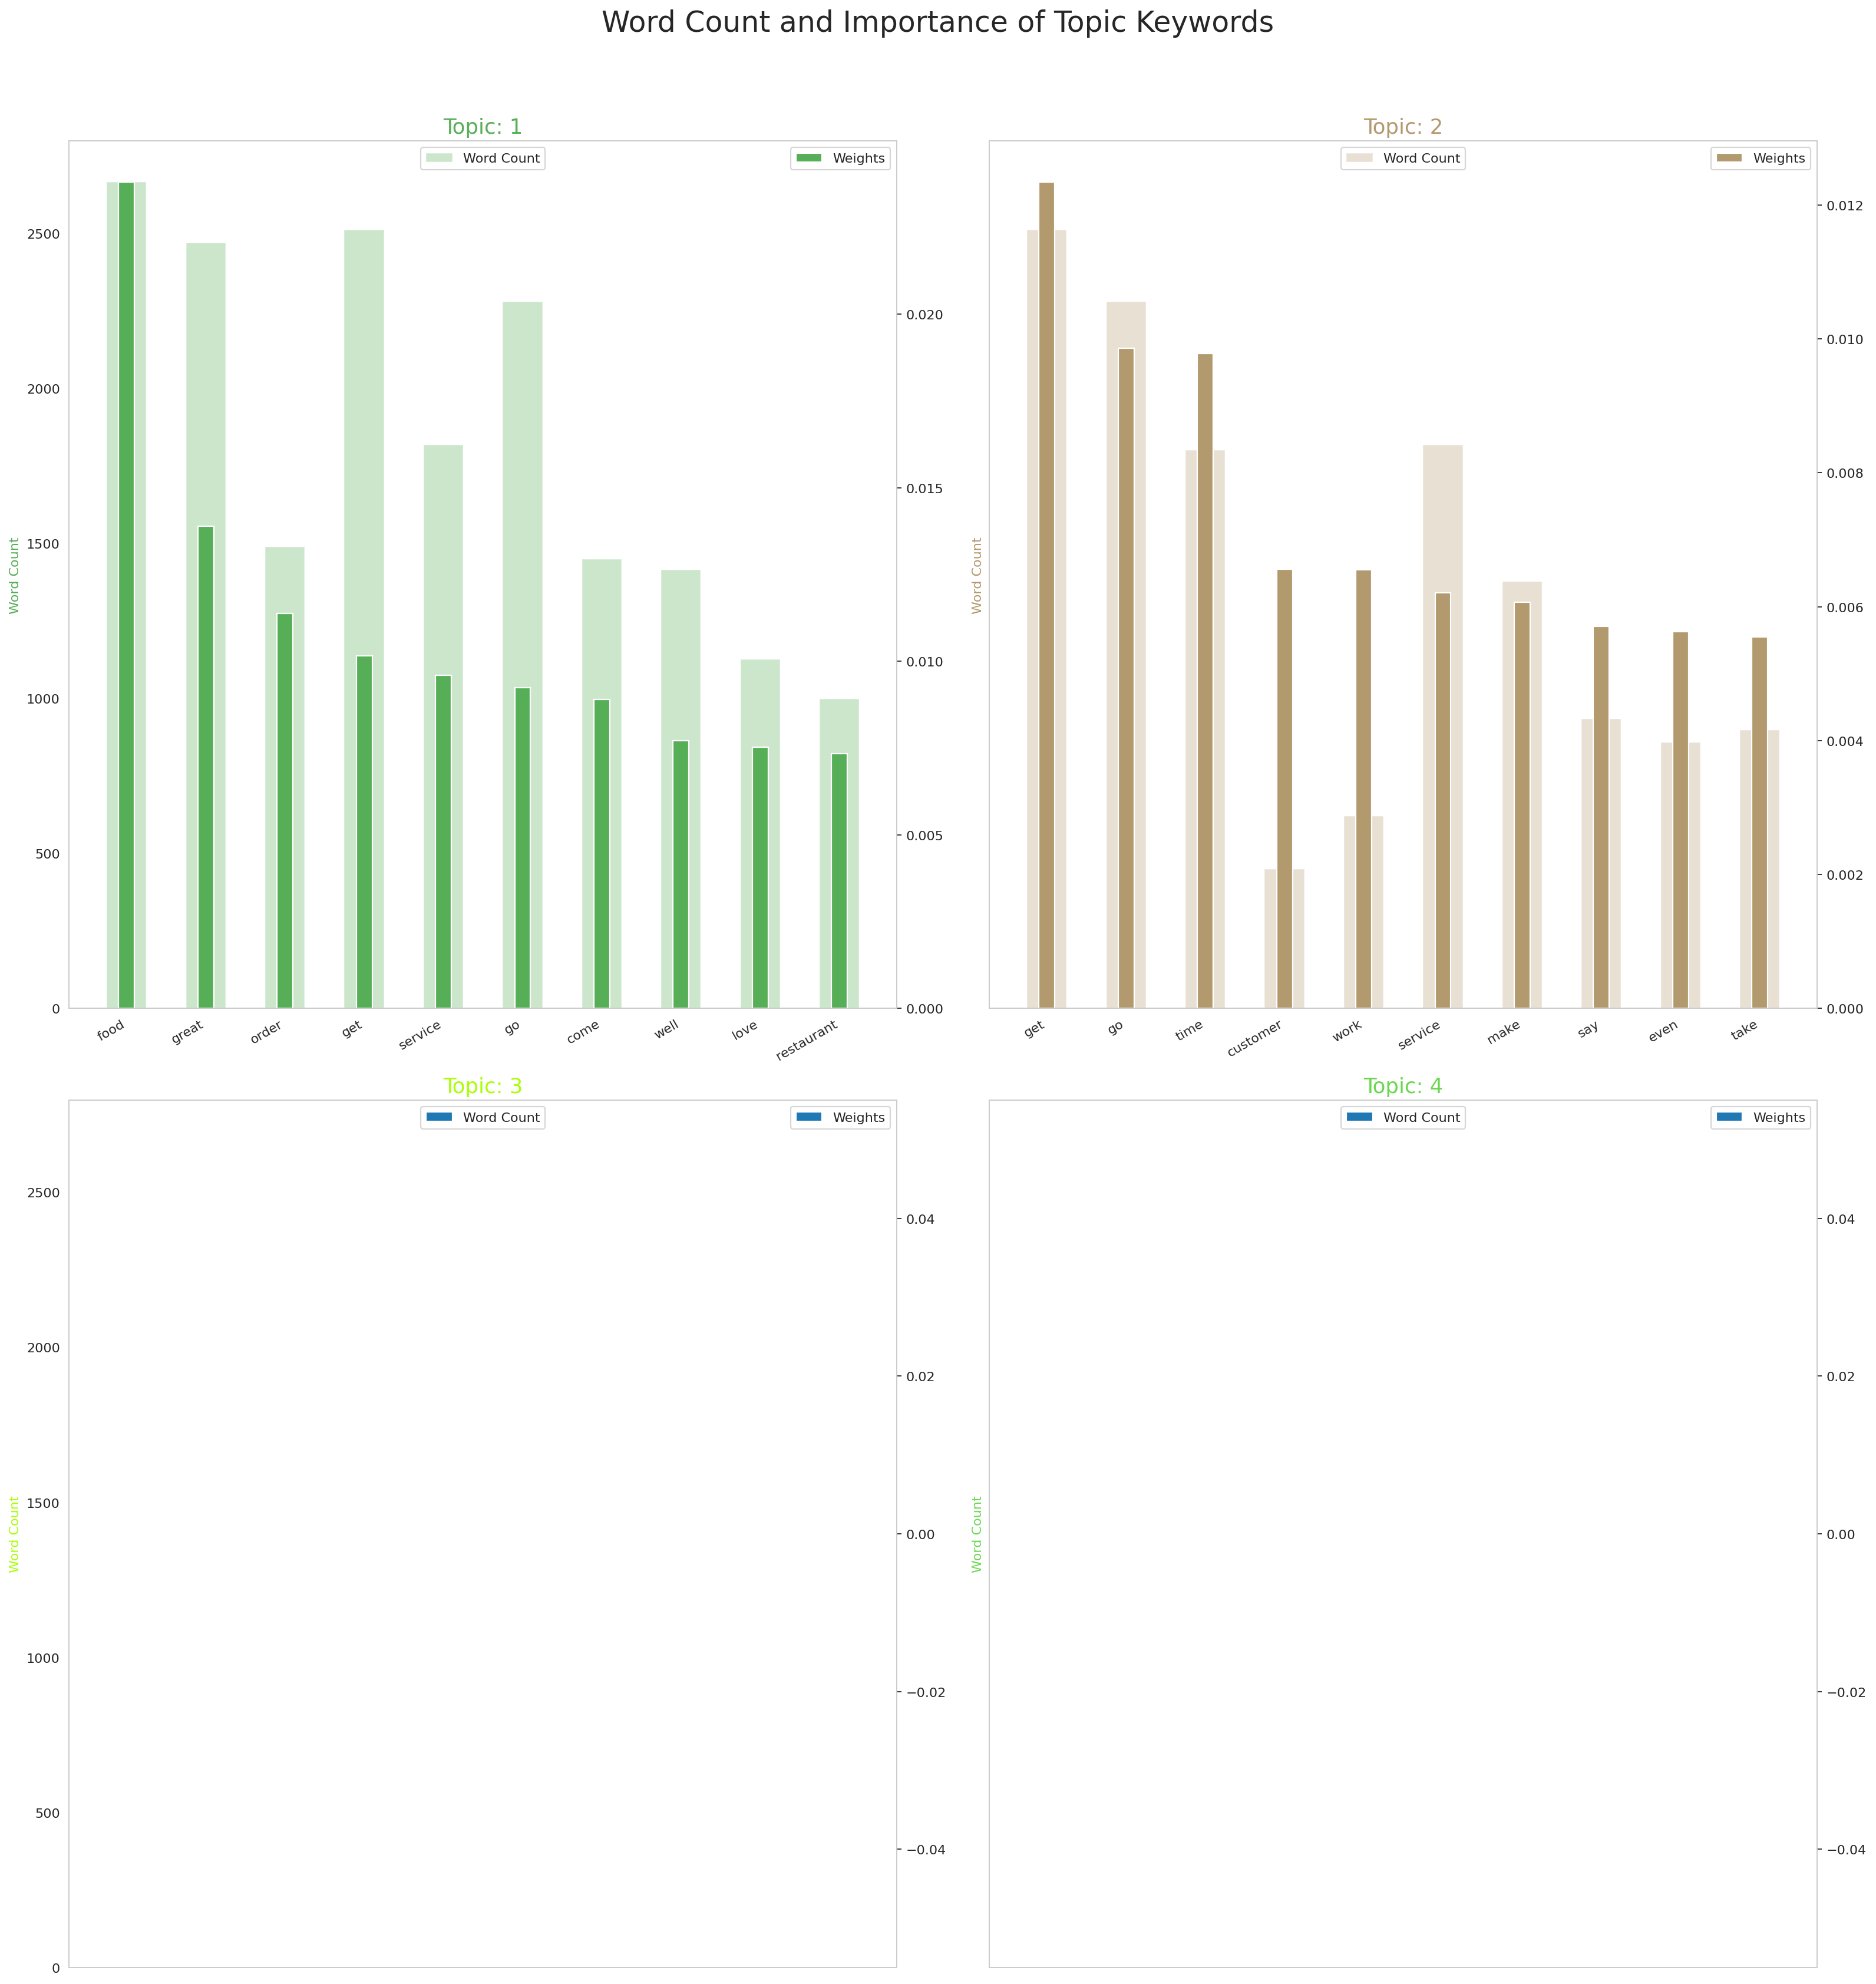

In [16]:
# Bar chart of word counts for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i + 1, weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(math.ceil(num_topics**(1/2)), math.ceil(num_topics**(1/2)), figsize=(20,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.XKCD_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i+1, :], color=cols[i+1], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i+1, :], color=cols[i+1], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i+1])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i + 1), color=cols[i+1], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i+1, 'word'], rotation=30, horizontalalignment= 'right')
    try:
      ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')
    except:
      pass

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

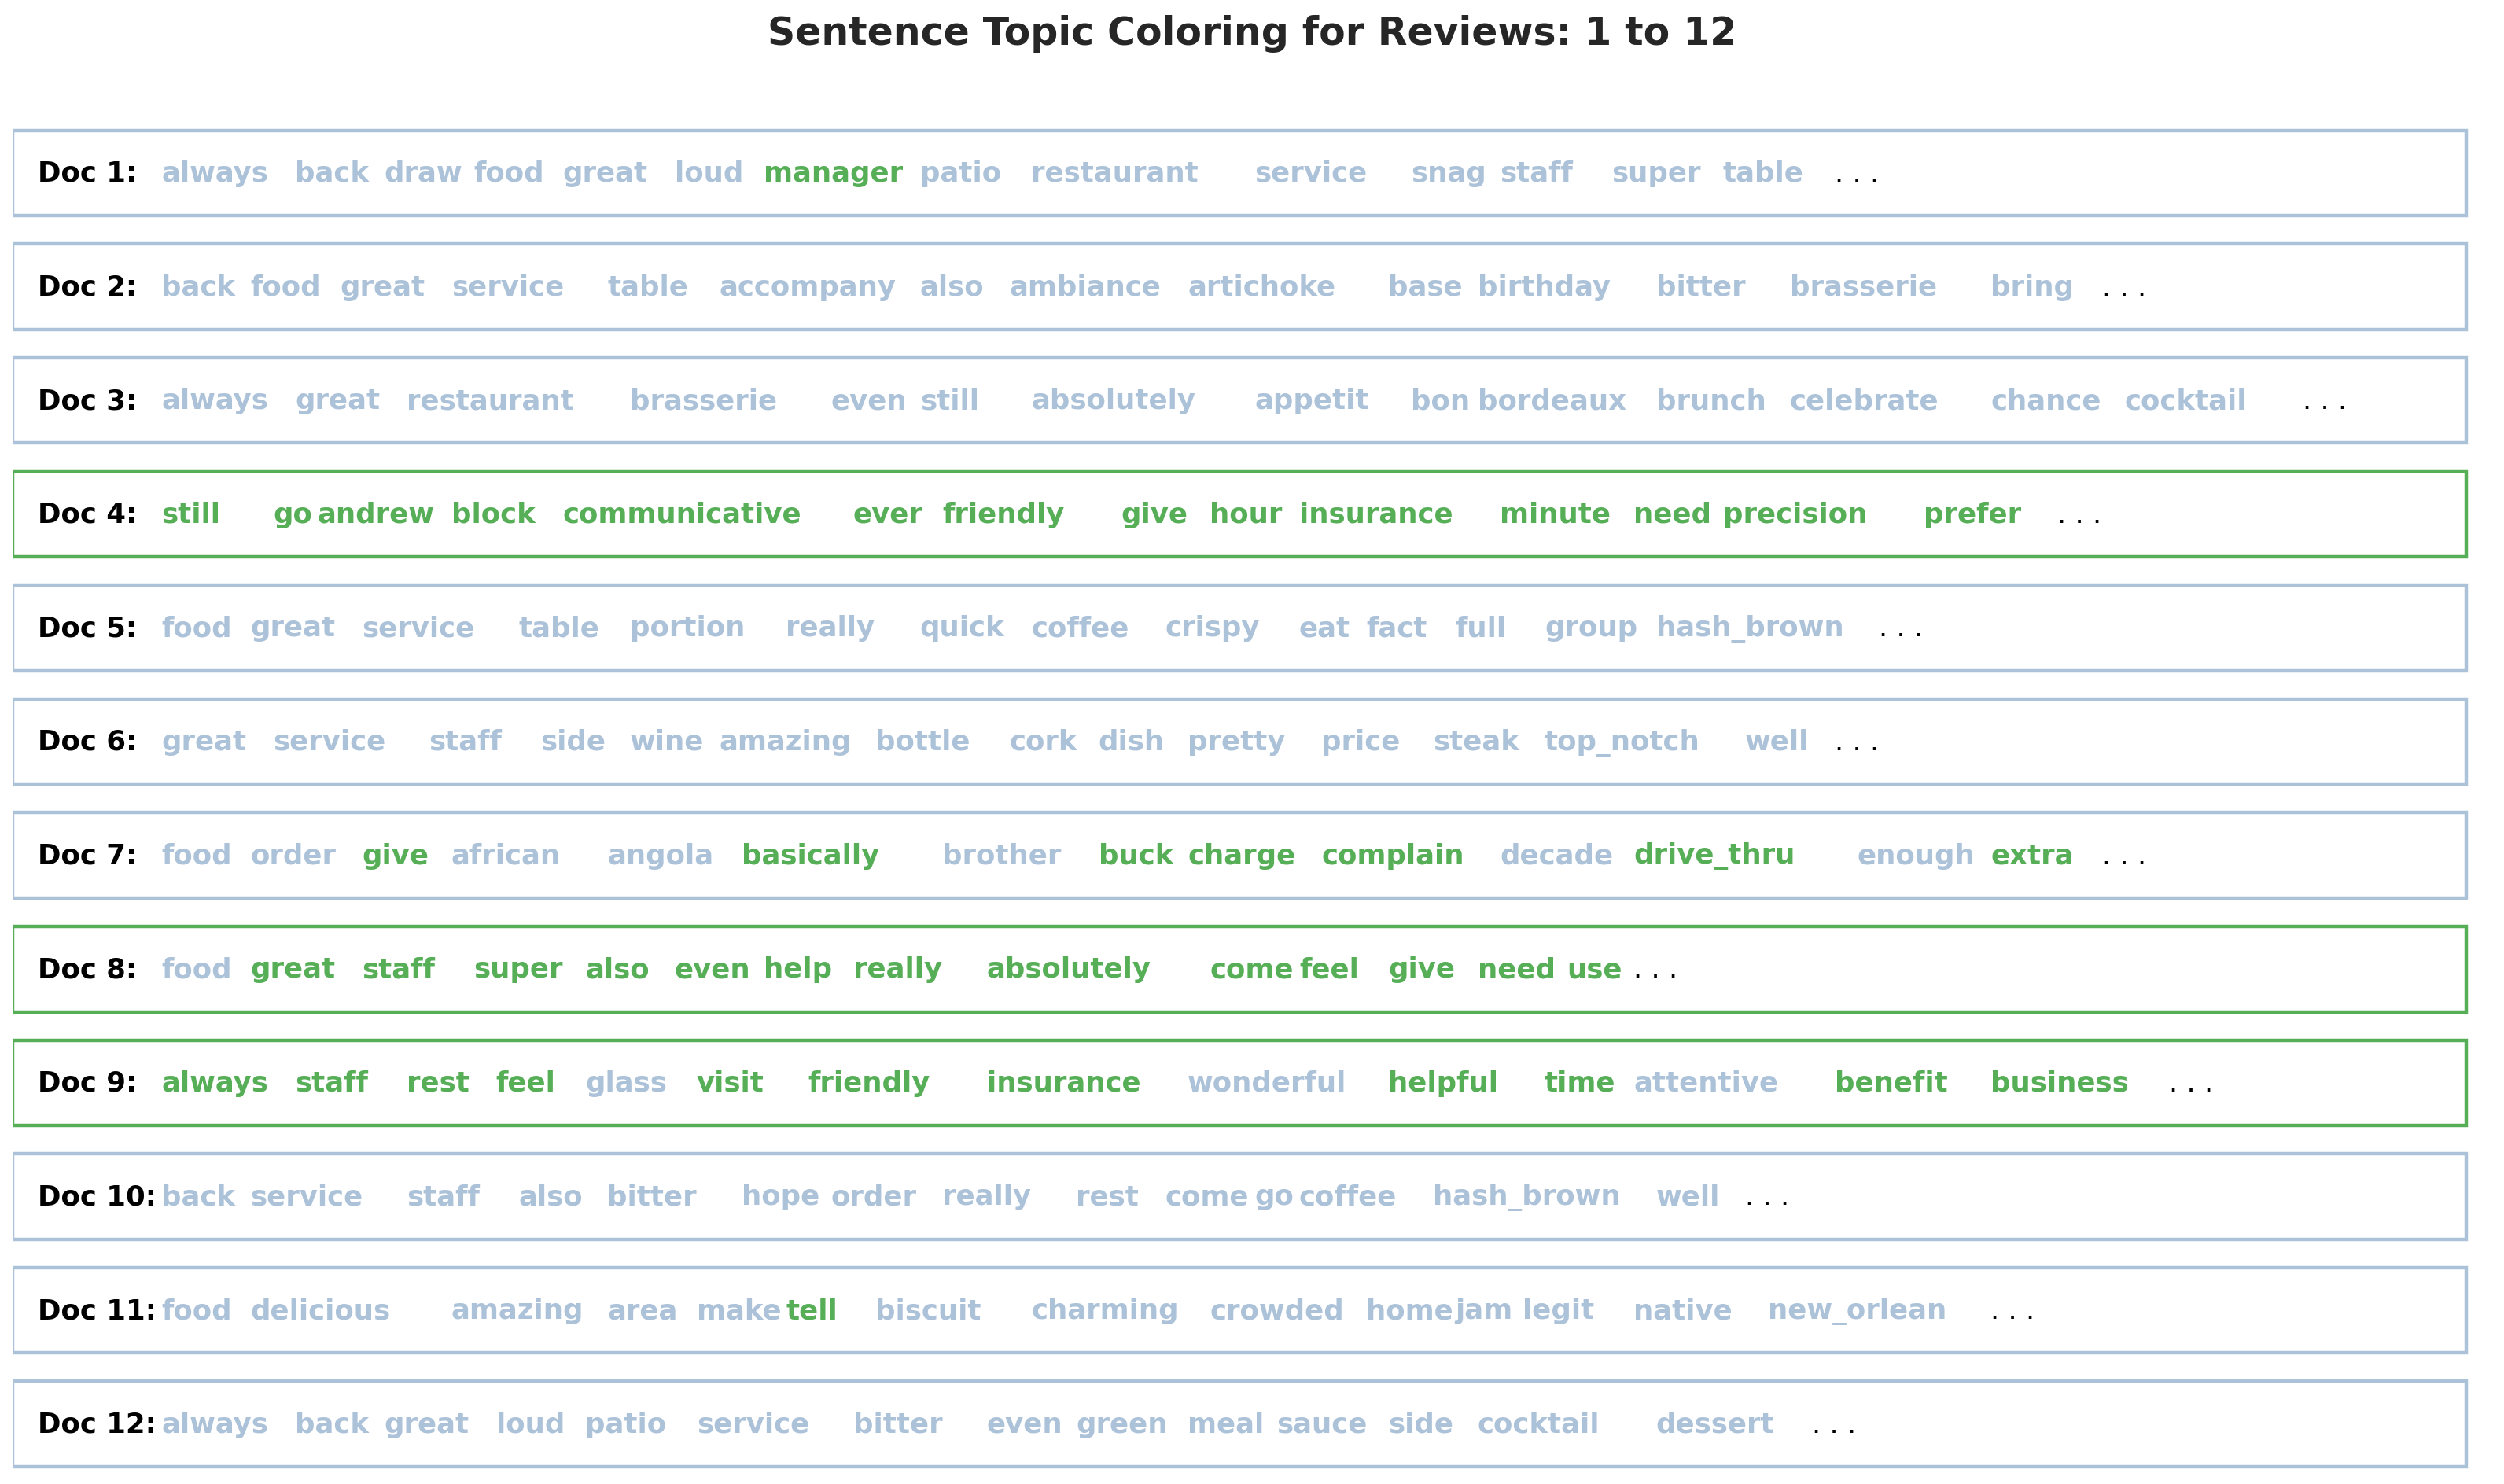

In [17]:
# Sentence Coloring of Number of reviews 
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.XKCD_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Reviews: ' + str(start + 1) + ' to ' + str(end-1), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [18]:
# Generate a list of the most dominant topics and then the three top keywords in each of those topics
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

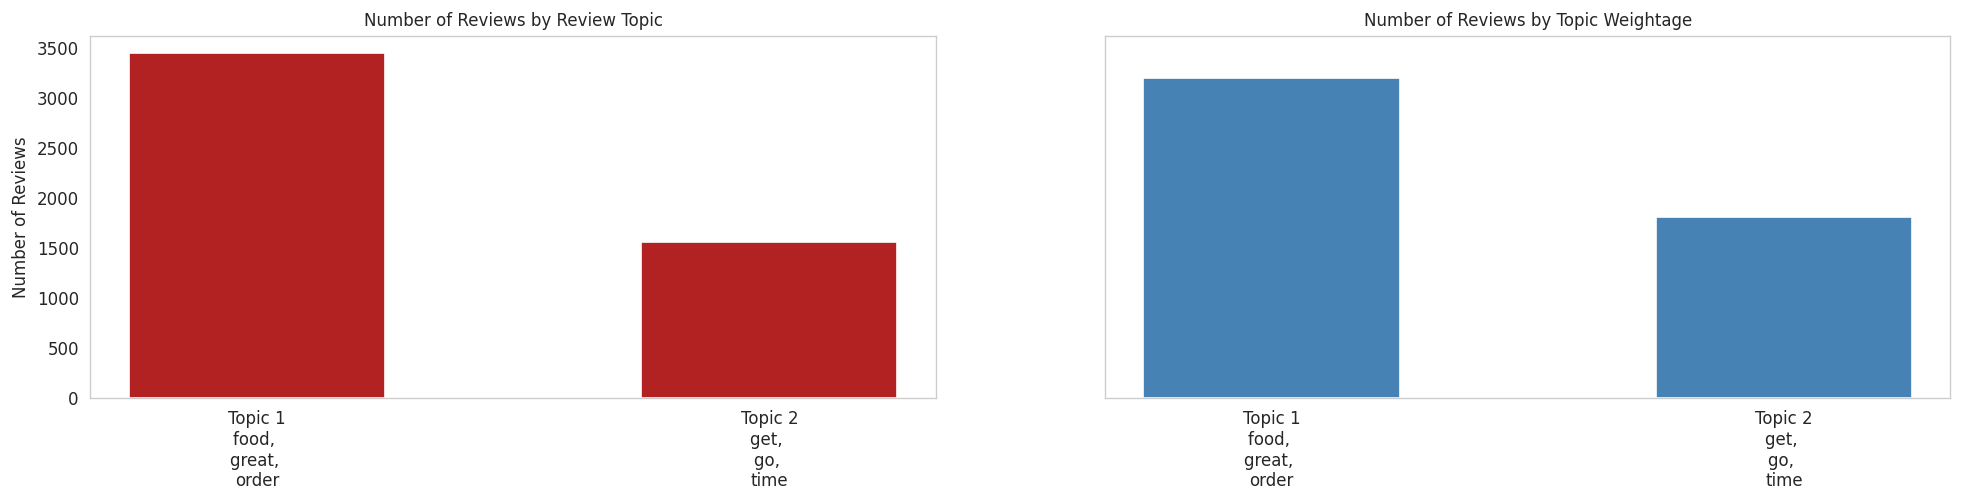

In [19]:
# Two Plots:
#    Num reviews per topic by assigning the document to the topic that has the most weight in that document.
#    Num reviews per topic by summing up the actual weight contribution of each topic to respective documents.

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), dpi=120, sharey=True)

# Topic Distribution by Review Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Reviews by Review Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Reviews')
# ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Reviews by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [20]:
# Get topic weights and dominant topics
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.001165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.909092
[t-SNE] KL divergence after 1000 iterations: 0.321952


Loading BokehJS ...

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.148362  0.0       1        1  58.922196
1     -0.148362  0.0       2        1  41.077804, topic_info=            Term         Freq        Total Category  logprob  loglift
3           food  3010.000000  3010.000000  Default  30.0000  30.0000
341     customer   579.000000   579.000000  Default  29.0000  29.0000
850         work   578.000000   578.000000  Default  28.0000  28.0000
8     restaurant   929.000000   929.000000  Default  27.0000  27.0000
1063        taco   912.000000   912.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
428         want   366.292181   712.367232   Topic2  -5.4838   0.2245
223   experience   365.258309   727.189078   Topic2  -5.4867   0.2011
157         well   432.635506  1408.787615   Topic2  -5.3174  -0.2909
858         know   312.630552   507.411078   Topic2  -5.6422   0.4054
4          great   370.656455  2126.993120   Topic2  -5.4720  -0.8575

[152 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
15        1  0.712292       also
15        2  0.287399       also
149       1  0.916942    amazing
149       2  0.082343    amazing
1077      1  0.004609  apartment
...     ...       ...        ...
157       2  0.307356       well
1179      1  0.008907      woman
1179      2  0.997584      woman
850       1  0.001728       work
850       2  0.998949       work

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])